# 5 Autoregressive Integrated Moving Average (ARIMA)

ARIMA, known as autoregressive integrated moving average models, is the combination of two time series models -
autoregressive models (AR) and moving average models (MA).

## Autoregressive Models (AR)

Current values in autoregressive models can be predicted by past values, which is in the general form of 
$$x_t = f(x_{t-1},x_{t-2},\dotsc, w_t)$$
For example, an additive noise model is given by 
$$x_t = f(x_{t-1},x_{t-2},\dotsc) + w_t$$

<br>

**Definition**. (Autoregressive models of order $p$) A zero-mean **stationary** process $x_t\sim {\rm AR}(p)$ when it admits 
$$x_t = \phi_1 x_{t-1}+\phi_2 x_{t-2}+\dotsc + \phi_p x_{t-p}+w_t$$
where $w_t\sim {\rm WN}(0,\sigma_w^2)$ and $\phi_i$ are constants. ($\phi_p \neq 0$)

In general, if the mean of a stationary process $x_t$ is $\mu \neq 0$, one can filter out the mean value and 
construct an AR model by 
$$x_t - \mu = \phi_1(x_{t-1} - \mu) + \phi_2(x_{t-2} - \mu) + \dotsc + \phi_p(x_{t-p} - \mu) + w_t$$
which is equivalent to, if we denote by $\alpha = \mu (1 - \phi_1 - \phi_2 - \dotsc - \phi_p)$, 
$$x_t = \alpha + \phi_1x_{t-1} + \phi_2 x_{t-2} + \dotsc + \phi_p x_{t-p} + w_t.$$

<br>

More generally if $x_t$ is not stationary but admits the equation above, we call $x_t$ admits the autoregressive equation. 

### Autoregressive Operator

Recall the backshift operator $B$ that $B(x_t) = x_{t-1}$. We define the autoregressive operator as
$$\phi (B) = 1 - \phi_1B - \phi_2B^2 - \dotsc - \phi_pB^p$$

Then one can rewrite the autoregressive equation above by
$$\phi(B)x_t = w_t$$

### AR(1)

${\rm AR}(1)$ stands for the autoregressive models with order $1$, which is 
$$x_t = \phi x_{t-1} + w_t$$

There are two main cases for $\phi$, as analyzed below. 

#### Causal

When $|\phi| < 1$, the ${\rm AR}(1)$ is called causal. The sufficient and necessary condition for stationarity of the ${\rm AR}(1)$ model is precisely $|\phi|<1$. And the regressive equation has a unique stationary solution in the form of 
$$x_t = \sum_{j=0}^{\infty} \phi_j w_{t-j}.
$$

Proof. If the model is stationary, then we can the variance of both sides and yield
$${\rm Var}(x_t) = \phi^2 {\rm Var}(x_{t-1}) + \sigma_w^2.$$
The stationarity has guaranteed that ${\rm Var}(x_t) = {\rm Var}(x_{t-1})$ so that 
$\sigma_w^2 = (1 - \phi^2)\gamma (0)$ and $|\phi|<1$.

On the other hand, if $|\phi | <1$ , one can represent the ${\rm AR}(1)$ model by 
$$x_t = \phi x_{t-1} + w_t = \phi^2 x_{t-2} + \phi w_{t-1} + w_t = \dotsc
=\sum_{j=0}^{\infty} \phi^j w_{t-j}.
$$
And thus we can compute its autocovariance by 
$$\gamma(h) = {\rm Cov}(x_{t+h},x_t) = {\rm Cov}\left(\sum_{j=-\infty}^{t} \phi^{t-j} w_{j}
,\sum_{j=-\infty}^{t+h} \phi^{t+h-j} w_{j}\right)
=\sigma_w^2 \sum_{j=-\infty}^{t} \phi^{t-j}\phi^{t+h-j} =\frac{\sigma_w^2 \phi^h}{1-\phi^2}
,$$
which is independent on $t$. Hence the series is stationary.

<br>

Finally we will prove that the stationary solution is unique.

Assume $\{y_t\}$ is a stationary solution and we shift back finite times to obtain
$$y_t = \phi^k y_{t-  k} + \sum_{j=0}^{k -1}\phi^j w_{t-j}$$

Yet both the mean and the variance of $y_{t-k}$ are bounded and $\phi^{2k}\rightarrow 0$, we learn that
$$\sum_{j=0}^{k-1}\phi^j w_{t-j}\stackrel{\mathbb P}{\longrightarrow }y_t$$


<br>

We shall note that
$$\gamma(h) =\frac{\sigma_w^2 \phi^{|h|}}{1-\phi^2},\quad \rho(h) =\phi^{|h|}$$

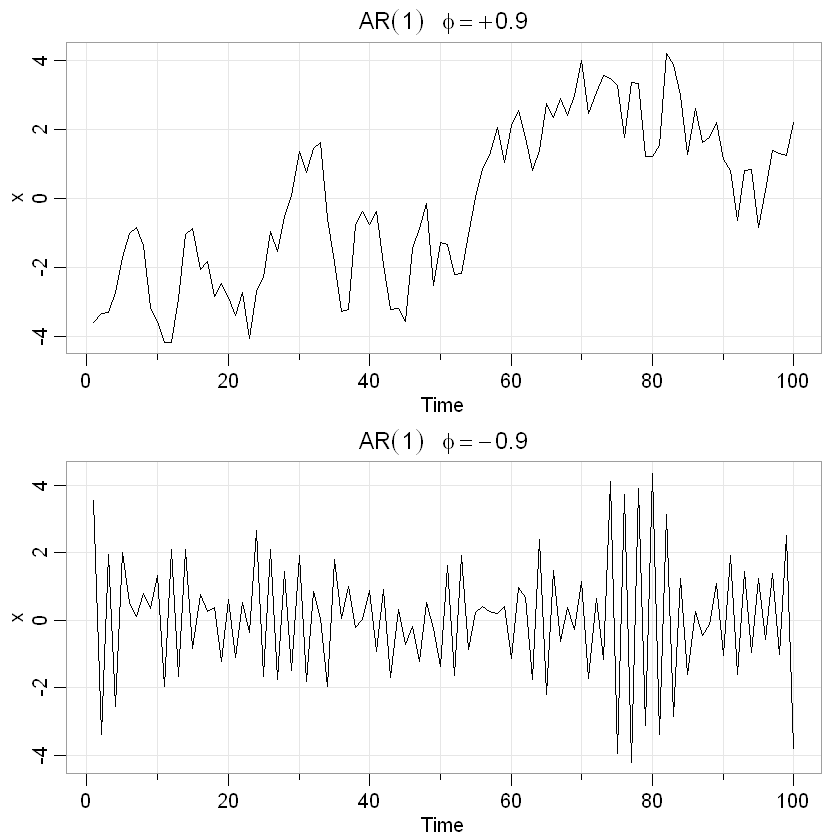

In [2]:
library(astsa)
par(mfrow = c(2,1))
tsplot(arima.sim(list(order=c(1,0,0), ar=.9), n = 100), ylab = 'x', main = (expression(AR(1)~~~phi==+.9)))
tsplot(arima.sim(list(order=c(1,0,0), ar=-.9), n = 100), ylab = 'x', main = (expression(AR(1)~~~phi==-.9)))

#### Explosive

When $|\phi|>1$, the ${\rm AR}(1)$ model is called explosive. One can literally rewrite the autoregressive equation as 
$$x_t = \phi^{-1}x_{t+1} - \phi^{-1}w_{t+1}$$

Then $|\phi^{-1}|<1$ and **IF WE ADMIT THAT $x_t$ IS DEPENDENT ON $w_{t+j}\ (j>0)$** rather $w_{t-j}$, we might apply the analysis above and
$$x_t = -\sum_{j=1}^{\infty}\phi^{-j}w_{t+j}$$

And under the assumption that $x_t$ is dependent on $w_{t+j}$, we deprive
$$\gamma(h) = \frac{\sigma_w^2 \phi^{-|h|-2}}{1-\phi^{-2}},\quad \rho(h) = \phi^{-|h|}.$$

Yet this is useless because all the knowledge is based on the future. 

One might construct a stochastically equivalent series $y_t$ by 
$$y_t = \phi^{-1}y_{t-1}+v_t,\quad v_t\sim N(0,\sigma_w^2\phi^{-2})$$
with the same mean and autocovariance as $x$.


<br>


### Inverse Autogregressive Operator

For a general order $p$ autoregressive model $\phi(B)x_t = w_t$, inspired by ${\rm AR(1)}$ we assume the solution is the form of 
$$x_t = \psi(B)w_t = \sum_{j=0}^{\infty}\psi_j w_{t-j},$$
hence
$$\phi(B)\psi(B)w_t = w_t$$
and by Neumann series, 
$$\psi(B) = \frac{1}{\phi (B)} = \frac{1}{1 - (\phi_1 B+\phi_2B^2+\dotsc +\phi_pB^p)}
=\sum_{j=0}^{\infty} (\phi_1B+\phi_2 B^2+\dotsc +\phi_p B^p)^j$$

## Moving Average Models (MA)

**Definition**. (Moving average models of order $q$) A  process $x_t\sim {\rm MA}(q)$ when it admits 
$$x_t = w_t+\theta_1 w_{t-1}+\dotsc + \theta_q w_{t-q}$$
where $w_t\sim {\rm WN}(0,\sigma_w^2)$ and $\theta_i$ are constants. ($\theta_q \neq 0$)

### Moving Average Operator

Recall the backshift operator $B$ that $B(x_t) = x_{t-1}$. We correspondingly define the moving average operator as
$$\theta (B) = 1 + \theta_1B + \theta_2B^2 + \dotsc + \theta_qB^q$$

Then one can rewrite the autoregressive equation above by
$$x_t = \theta(B) w_t$$

It is easy to verify that $x_t$ is stationary.

### MR(1)

${\rm MR}(1)$ is the special case where order $q = 1$. More specifically, 
$$x_t = w_{t-1} + \theta w_{t-1}$$

One is easy to compute that
$$\gamma(h) = \left\{\begin{array}{cc} (1+\theta ^2)\sigma_w^2  & h = 0 
\\ \theta \sigma_w^2 & h = 1\\ 0 & h > 1\end{array}\right. 
\quad \rho(h) = \left\{\begin{array}{cc} \frac{\theta}{1+\theta^2} & h = 1\\ 0 & h > 1\end{array}\right.$$

It is clear that $x_t$ is correlated with $x_{t-1}$, but not with $x_{t-j} (j>1)$. Moreover, $|\rho(1)|\leqslant \frac 12$ for whatever parameter $\theta$.

We shall note that, if $v_t\sim N(0,\theta^2\sigma_w^2)$, then
$$y_t = y_{t-1} + \theta^{-1} v_{t-1}$$
has the same autocovariance and autocorrelation, implying stochastical equivalence.

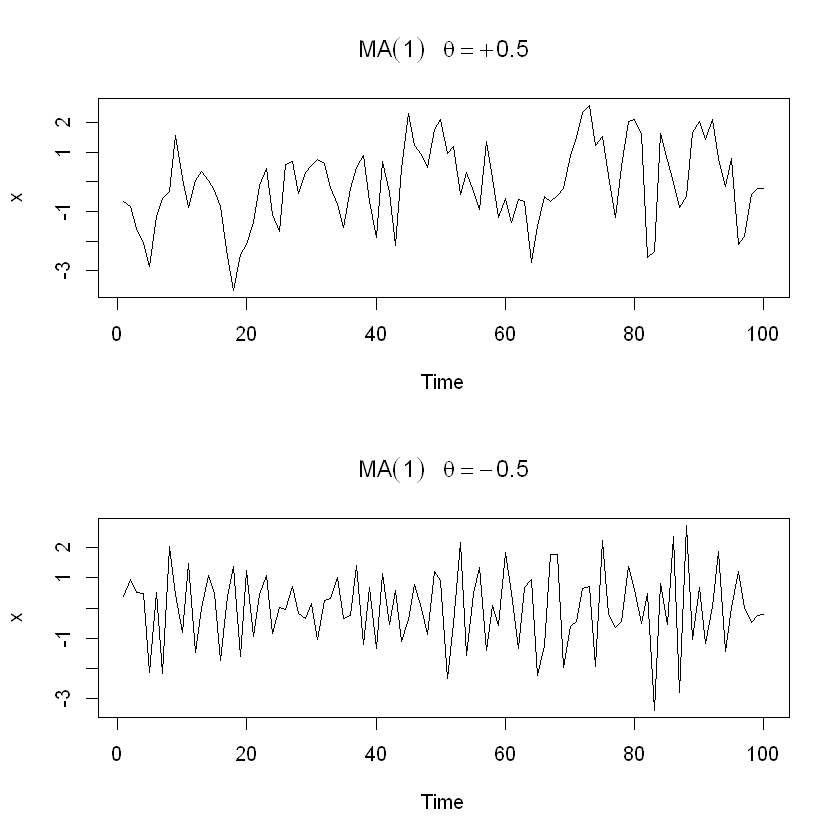

In [5]:
par(mfrow = c(2,1))
plot(arima.sim(list(order=c(0,0,1), ma=.9), n=100), ylab="x", main=(expression(MA(1)~~~theta==+.5)))
plot(arima.sim(list(order=c(0,0,1), ma=-.9), n=100), ylab="x", main=(expression(MA(1)~~~theta==-.5)))

### Inverse Moving Average Operator

In the same manner we assume
$$w_t = \pi(B)x_t = \sum_{j=0}^{\infty} \pi_j x_{t-j}$$
and 
$$\pi (B) = \frac{1}{\theta(B)} = \sum_{j=0}^{\infty} \left(-(1+\theta_1 B+\theta_2 B+\dotsc +\theta_qB)\right)^j$$

Lemma. if $w_i\sim N(0,\sigma^2),\ i=1,2,\dotsc$ are uncorrelated ($\sigma>0$). A random variable $X$ and a constant $c\neq 0$ satisfy that for all $i$ we have ${\rm Cov}(X,w_i) = c$. Then ${\rm Var}(X)$ is unbounded.

Proof. Let $\rho = \frac{c}{2\sigma^2}$ and consider
$$\begin{aligned}0&\leqslant {\rm Cov}(X - \rho(w_1+w_2+\dotsc +w_n), \ X - \rho(w_1+w_2+\dotsc+w_n))
\\ &={\rm Var}(X) - 2\rho n c+\rho^2n \sigma^2
\\ &={\rm Var}(X) - \frac{3}{4}nc^2\sigma^{-2}\end{aligned}$$
Let $n\rightarrow \infty$ and ${\rm Var}(X)\rightarrow +\infty$.

## Autoregressive Moving Average Models (ARMA)

**Definition**. (Autoregressive moving average models of order $p,q$) A zero-mean stationary process $x_t\sim {\rm ARMA}(p,q)$ when it admits 
$$x_t = \phi_1 x_{t-1}+\phi_2x_{t-2} +\dotsc + \phi_p x_{t-p} + w_t+\theta_1 w_{t-1}+\dotsc + \theta_q w_{t-q}$$
where $w_t\sim {\rm WN}(0,\sigma_w^2)$ and $\phi_i,\theta_i$ are constants. ($\phi_p,\theta_q \neq 0$)

In general if the stationary series $x_t$ has mean $\mu$, then one can denote $\alpha = \mu(1- \theta_1 -  \dotsc - \theta_p)$ and write
$$x_t = \alpha +\phi_1 x_{t-1}+\phi_2x_{t-2} +\dotsc + \phi_p x_{t-p} + w_t+\theta_1 w_{t-1}+\dotsc + \theta_q w_{t-q}.$$

<br>

If one uses the operator notations above, it is equivalent to
$$\phi(B)x_t = \theta(B)w_t$$
where
$$\begin{aligned}\phi(B) &= 1 - \phi_1(B) - \dotsc - \phi_p(B)\\ 
\theta(B) &= 1+\theta_1(B)+\dotsc +\theta_q(B)\end{aligned}$$

#### Parameter Redundancy

For example, $x_{t} = \frac12 x_{t-1}  - \frac 12 w_{t-1}+w_t$, or $(1-\frac 12B)x_t = (1-\frac 12B )w_t$ should be simplified as $x_t = w_t$.

#### Causality

An ARMA model is called causal iff $X_t$ can be written as a one-sided linear process,
$$x_t = \Psi(B) w_t = \sum_{j=0}^{\infty} \psi_j w_{t-j}$$
where $\Psi(B) = \sum_{j=0}^{\infty}\psi_jB^j$ and has $\psi_0 = 1$ and $\sum_{j=0}^{\infty}|w_j|<+\infty$. Also, one can prove that an ARMA model in the form $\phi(B) x_t =  \theta(B)w_t$ is causal iff
$\phi(z)\neq 0$ in the unit disk $|z|\leqslant 1$. The solution of $\Psi(B)$ is given by 
$$\Psi(B) = \frac{\theta(B)}{\phi(B)}.$$

#### Invertibility

An ARMA model is invertible iff it admits the form 
$$w_t = \pi(B)x_t = \sum_{j=0}^{\infty}\pi_j x_{t-j}$$
where $\pi(B) = \sum_{j=0}^{\infty}\pi_jB^j$ and has $\pi_0 = 1$ and $\sum_{j=0}^{\infty}|\pi_j|<+\infty$. One can similarly show that an ARMA model is invertible iff 
$\theta(z)\neq 0$ in the unit disk $|z|\leqslant  1$. The solution of $\pi(B)$ is given by 
$$\pi(B) = \frac{\phi(B)}{\theta (B)}$$


#### AR(2)

One can verify that an ${\rm AR}(2)$ process $(1 - \phi_1B - \phi_2B^2)x_t = w_t$ is causal iff 
$$\phi_1+\phi_2<1,\quad \phi_2 - \phi_1<1,\quad |\phi_2|<1.$$

## Difference Equations

### AR

Consider a **causal** ${\rm AR}$ process $\phi(B)x_t = w_t$ and we multiply $x_{t-h}\ (h\geqslant 1)$ on both sides to get 
$$\mathbb E(\phi(B)x_t\cdot x_{t-h}) = \mathbb E(w_tx_{t-h})
=\mathbb E(w_t \sum_{j=0}^{\infty} \phi_j w_{t-h-j}) = 0$$
Note that $\mathbb E(x_tx_{t-h}) = {\rm Cov}(x_t,x_{t-h}) = \gamma(h)$, we conclude the recurrence
$$\gamma (h) - \sum_{k=1}^p\phi_k\gamma(h-k)  = 0\quad (h\geqslant 1).$$
and
$$\rho (h) - \sum_{k=1}^p\phi_k\rho(h-k)  = 0\quad (h\geqslant 1).$$

The initial values $\rho(0) = 1,\rho(1),\dotsc,\rho(p-1)$ can be obtained by solving the linear system formed by 
$h = 1,2,\dotsc, p-1$. And we can solve all ACF $\rho(n)$ by the recurrence. These two equations are called difference equations of an AR model.

The characteristic equation of the recurrence is given by 
$$0 = z^{p} - \sum_{k=1}^p \phi_k z^{p-k} = \prod_{k=1}^p (z - \frac{1}{z_k})$$
where $z_k$ are the roots of $\phi(B)$ and $|z_k|>1$ by causality.


#### AR(2)

For ${\rm AR}(2)$, $\rho(n)\rightarrow 0$ because of the bounded eigenvalues of the recurrence $|\frac{1}{z_k}|<1$. Particularly, if the roots of ${\rm AR}(2)$ are complex, then its  ACF shows sinusoidal pattern in  decay since 
$$\rho(h) = c_1z_1^{-h} + c_2\overline{z_2}^{-h}$$
And the solution is in the following form, where $\omega = {\rm Arg}(z_1)$,
$$\rho(h) = a|z_1|^{-h}\cos(\omega h +   \varphi)$$

Roots  = 1+0.57735i 1-0.57735i 
Period = 12 


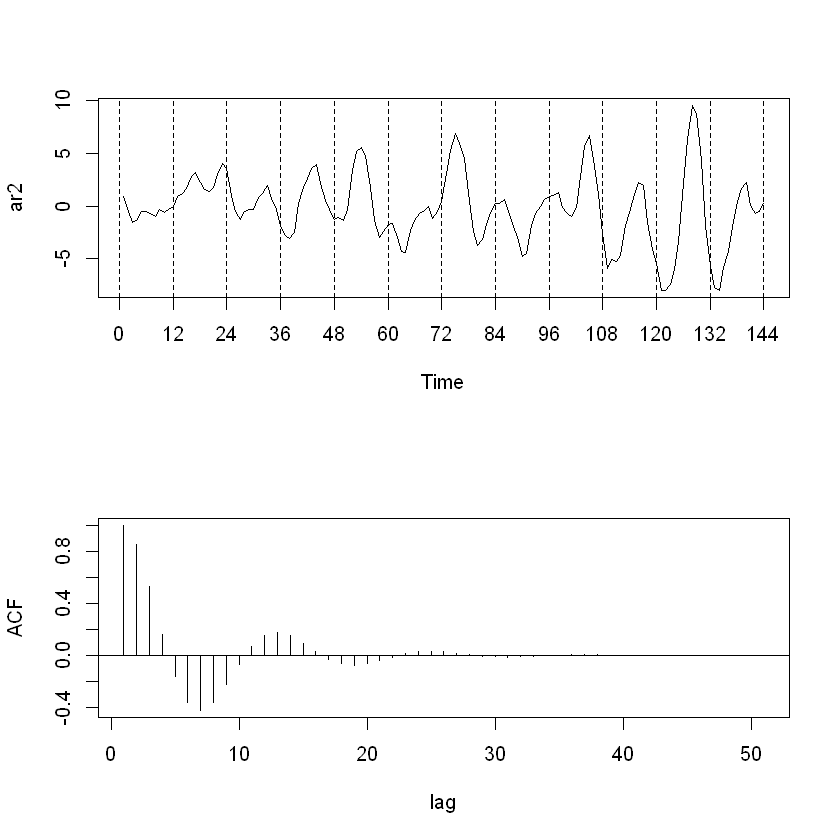

In [10]:
library('astsa')
# an AR model with phi = 1 + 1.5z - .75z^2
roots <- polyroot(c(1, -1.5, .75))
cat('Roots  =', roots, '\nPeriod =', 2 * pi / Arg(roots[1]),'\n')
ar2 <- arima.sim(list(order=c(2,0,0), ar=c(1.5,-.75)), n = 144)

par(mfrow = c(2,1))
plot(ar2, axes=FALSE, xlab="Time")
axis(2); axis(1, at=seq(0,144,by=12)); box()
abline(v=seq(0,144,by=12), lty=2)
ACF <- ARMAacf(ar=c(1.5,-.75), ma=0, 50)
f <- function(x){ 2*sqrt(13)/7 * (sqrt(.75) ^ x) * cos(-pi/6 * x + atan(sqrt(3)/7))}
#print(ACF - f(0:(length(ACF)-1)))
plot(ACF, type="h", xlab="lag")
abline(h=0)

## MA

As for MA models, $x_{t} = \sum_{j=0}^q \theta_j w_{t-j}$ where $\theta_0 = 1$, direct computation yields
$$\gamma(h) = {\rm Cov}\left(\sum_{j=0}^q \theta_j w_{t-j}, \sum_{j=0}^q \theta _j w_{t+h-j}\right)
=\left\{\begin{array}{ll}
\sigma_w^2\sum_{j=0}^{q-h}\theta_j\theta_{j+h} & \quad 0\leqslant h\leqslant q,\\ 
0 &\quad h >q.\end{array}\right.
$$
and by $\gamma(0) = \sum_{j=0}^q \theta_j^2$ we get
$$\rho(h) =  \left\{\begin{array}{ll}
\frac{\sigma_w^2\sum_{j=0}^{q-h}\theta_j\theta_{j+h}}{\sum_{j=0}^q \theta_j^2} & \quad 0\leqslant h\leqslant q,\\ 
0 &\quad h >q.\end{array}\right.
$$

It has the truncation property that its ACF is zero as long as $h>q$, hence we can estimate $q$ by judging when ACF vanishes.

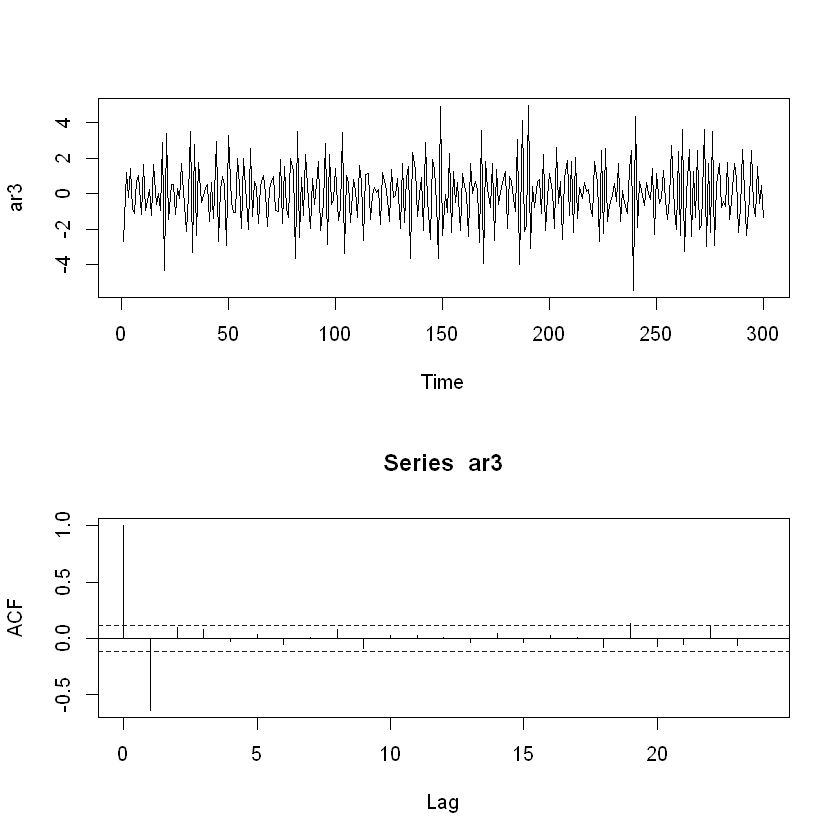

In [24]:
ar3 <- arima.sim(n = 300, list(order = c(0,0,2), ma = c(-1.5, .75)))
par(mfrow = c(2,1))
plot(ar3)
acf(ar3)

### ARMA
